Реализовать нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг (conv-pool)-(conv-pool)-...) на сifar10.

In [ ]:
import numpy as np

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import os

In [ ]:
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

# установка параметров нейросети
batch_size = 32
num_classes = 10
epochs = 5
# data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# конфигурирование слоев нейросети
model = Sequential()

x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
x_train.shape

(50000, 32, 32, 3)

**Модель 1** Самое большое количество карт признаков

In [ ]:
model = Sequential()

model.add(Conv2D(64, (7, 7), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [ ]:
history1 = model.fit(x_train, y_train, batch_size=batch_size,
	epochs=epochs, validation_split=0.2, 
	verbose=1)

Epoch 1/5
1250/1250 [==============================] - 719s 575ms/step - loss: 1.8948 - accuracy: 0.3094 - val_loss: 1.5844 - val_accuracy: 0.4290
Epoch 2/5
1250/1250 [==============================] - 717s 574ms/step - loss: 1.4770 - accuracy: 0.4719 - val_loss: 1.4383 - val_accuracy: 0.4796
Epoch 3/5
1250/1250 [==============================] - 716s 573ms/step - loss: 1.3053 - accuracy: 0.5364 - val_loss: 1.2754 - val_accuracy: 0.5499
Epoch 4/5
1250/1250 [==============================] - 716s 573ms/step - loss: 1.1705 - accuracy: 0.5846 - val_loss: 1.1613 - val_accuracy: 0.5928
Epoch 5/5
1250/1250 [==============================] - 717s 574ms/step - loss: 1.0553 - accuracy: 0.6313 - val_loss: 1.1035 - val_accuracy: 0.6156


In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 42s 135ms/step - loss: 1.1050 - accuracy: 0.6110
Test loss: 1.1049737930297852
Test accuracy: 0.6110000014305115


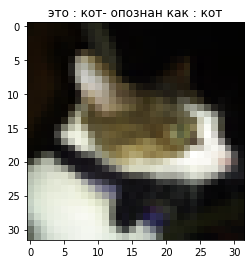

In [ ]:
N = 245
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

In [ ]:
history12 = model.fit(x_train, y_train, batch_size=batch_size,
	epochs=epochs, validation_split=0.2, 
	verbose=1)


Epoch 1/5
1250/1250 [==============================] - 724s 579ms/step - loss: 0.9437 - accuracy: 0.6707 - val_loss: 1.0393 - val_accuracy: 0.6445
Epoch 2/5
1250/1250 [==============================] - 721s 577ms/step - loss: 0.8496 - accuracy: 0.7047 - val_loss: 0.9930 - val_accuracy: 0.6523
Epoch 3/5
1250/1250 [==============================] - 722s 578ms/step - loss: 0.7564 - accuracy: 0.7364 - val_loss: 1.0013 - val_accuracy: 0.6633
Epoch 4/5
1250/1250 [==============================] - 720s 576ms/step - loss: 0.6691 - accuracy: 0.7669 - val_loss: 0.9361 - val_accuracy: 0.6884
Epoch 5/5
1250/1250 [==============================] - 722s 577ms/step - loss: 0.5869 - accuracy: 0.7960 - val_loss: 0.9861 - val_accuracy: 0.6854


In [ ]:
scores1 = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 42s 135ms/step - loss: 0.9829 - accuracy: 0.6823
Test loss: 1.0990113019943237
Test accuracy: 0.6200000047683716


**Модель 2** Уменьшаем количество карт признаков

In [ ]:
model2 = Sequential()

model2.add(Conv2D(32, (7, 7), padding='same', input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model2.add(Conv2D(64, (5, 5), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(Conv2D(128, (3, 3), padding='same'))
model2.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(x_train, y_train, batch_size=batch_size,
	epochs=epochs, validation_split=0.2, 
	verbose=1)

Epoch 1/5
1250/1250 [==============================] - 250s 200ms/step - loss: 1.6529 - accuracy: 0.3920 - val_loss: 1.4883 - val_accuracy: 0.4570
Epoch 2/5
1250/1250 [==============================] - 247s 198ms/step - loss: 1.3597 - accuracy: 0.5118 - val_loss: 1.2840 - val_accuracy: 0.5391
Epoch 3/5
1250/1250 [==============================] - 248s 198ms/step - loss: 1.2105 - accuracy: 0.5690 - val_loss: 1.1879 - val_accuracy: 0.5808
Epoch 4/5
1250/1250 [==============================] - 248s 198ms/step - loss: 1.0971 - accuracy: 0.6089 - val_loss: 1.1627 - val_accuracy: 0.5976
Epoch 5/5
1250/1250 [==============================] - 248s 198ms/step - loss: 1.0174 - accuracy: 0.6393 - val_loss: 1.0948 - val_accuracy: 0.6225


In [ ]:
scores = model2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 15s 47ms/step - loss: 1.0990 - accuracy: 0.6200
Test loss: 1.0990113019943237
Test accuracy: 0.6200000047683716


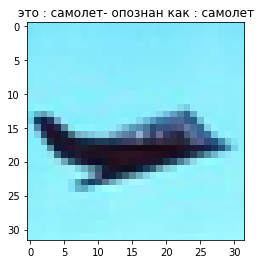

In [ ]:
N = 297
y_p=model2.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

In [ ]:
history22 = model2.fit(x_train, y_train, batch_size=batch_size,
	epochs=epochs, validation_split=0.2, 
	verbose=1)

Epoch 1/5
1250/1250 [==============================] - 248s 199ms/step - loss: 0.9371 - accuracy: 0.6697 - val_loss: 1.0762 - val_accuracy: 0.6316
Epoch 2/5
1250/1250 [==============================] - 248s 199ms/step - loss: 0.8743 - accuracy: 0.6920 - val_loss: 1.1351 - val_accuracy: 0.6268
Epoch 3/5
1250/1250 [==============================] - 249s 199ms/step - loss: 0.8140 - accuracy: 0.7135 - val_loss: 1.0648 - val_accuracy: 0.6380
Epoch 4/5
1250/1250 [==============================] - 249s 199ms/step - loss: 0.7597 - accuracy: 0.7329 - val_loss: 1.1416 - val_accuracy: 0.6231
Epoch 5/5
1250/1250 [==============================] - 249s 199ms/step - loss: 0.7154 - accuracy: 0.7492 - val_loss: 1.1477 - val_accuracy: 0.6441


In [ ]:
scores2 = model2.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 15s 47ms/step - loss: 1.1519 - accuracy: 0.6440
Test loss: 1.0990113019943237
Test accuracy: 0.6200000047683716


**Модель 3** Уменьшаем количество карт признаков

In [ ]:
model3 = Sequential()

model3.add(Conv2D(16, (7, 7), padding='same', input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model3.add(Conv2D(32, (5, 5), padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model3.add(Conv2D(32, (3, 3), padding='same'))
model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model3.add(Flatten())
model3.add(Dense(64))
model3.add(Activation('relu'))
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

In [ ]:
model3.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
history3 = model3.fit(x_train, y_train, batch_size=batch_size,
	epochs=epochs, validation_split=0.2, 
	verbose=1)

Epoch 1/5
1250/1250 [==============================] - 110s 88ms/step - loss: 1.6137 - accuracy: 0.4132 - val_loss: 1.4573 - val_accuracy: 0.4724
Epoch 2/5
1250/1250 [==============================] - 111s 89ms/step - loss: 1.2940 - accuracy: 0.5379 - val_loss: 1.2353 - val_accuracy: 0.5608
Epoch 3/5
1250/1250 [==============================] - 111s 89ms/step - loss: 1.1606 - accuracy: 0.5871 - val_loss: 1.1757 - val_accuracy: 0.5861
Epoch 4/5
1250/1250 [==============================] - 111s 89ms/step - loss: 1.0660 - accuracy: 0.6222 - val_loss: 1.1325 - val_accuracy: 0.6039
Epoch 5/5
1250/1250 [==============================] - 111s 89ms/step - loss: 0.9965 - accuracy: 0.6470 - val_loss: 1.0460 - val_accuracy: 0.6345


In [ ]:
scores3 = model3.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 7s 23ms/step - loss: 1.0468 - accuracy: 0.6343
Test loss: 1.0990113019943237
Test accuracy: 0.6200000047683716


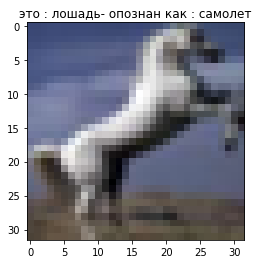

In [ ]:
N = 1941
y_p=model3.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

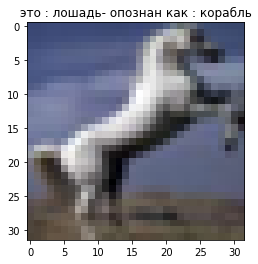

In [ ]:
N = 1941
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

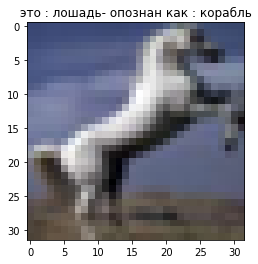

In [ ]:
N = 1941
y_p=model2.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

In [ ]:
history32 = model3.fit(x_train, y_train, batch_size=batch_size,
	epochs=epochs, validation_split=0.2, 
	verbose=1)

Epoch 1/5
1250/1250 [==============================] - 112s 89ms/step - loss: 0.9312 - accuracy: 0.6719 - val_loss: 1.1095 - val_accuracy: 0.6232
Epoch 2/5
1250/1250 [==============================] - 110s 88ms/step - loss: 0.8772 - accuracy: 0.6891 - val_loss: 1.0667 - val_accuracy: 0.6426
Epoch 3/5
1250/1250 [==============================] - 110s 88ms/step - loss: 0.8310 - accuracy: 0.7079 - val_loss: 1.0438 - val_accuracy: 0.6509
Epoch 4/5
1250/1250 [==============================] - 111s 89ms/step - loss: 0.7888 - accuracy: 0.7206 - val_loss: 1.0064 - val_accuracy: 0.6632
Epoch 5/5
1250/1250 [==============================] - 110s 88ms/step - loss: 0.7576 - accuracy: 0.7332 - val_loss: 1.0396 - val_accuracy: 0.6484


In [ ]:
scores3 = model3.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 7s 23ms/step - loss: 1.0687 - accuracy: 0.6392
Test loss: 1.0990113019943237
Test accuracy: 0.6200000047683716


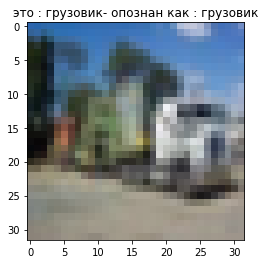

In [ ]:
N = 7982
y_p=model3.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

**Модель 4** Уменьшаем количество карт признаков

In [ ]:
model4 = Sequential()

model4.add(Conv2D(8, (7, 7), padding='same', input_shape=x_train.shape[1:]))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model4.add(Conv2D(16, (5, 5), padding='same'))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model4.add(Conv2D(16, (3, 3), padding='same'))
model4.add(Conv2D(32, (3, 3), padding='same'))
model4.add(Conv2D(32, (3, 3), padding='same'))
model4.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model4.add(Flatten())
model4.add(Dense(32))
model4.add(Activation('relu'))
model4.add(Dense(num_classes))
model4.add(Activation('softmax'))

In [ ]:
model4.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
history4 = model4.fit(x_train, y_train, batch_size=batch_size,
	epochs=epochs, validation_split=0.2, 
	verbose=1)

Epoch 1/5
1250/1250 [==============================] - 75s 60ms/step - loss: 1.7243 - accuracy: 0.3622 - val_loss: 1.4918 - val_accuracy: 0.4604
Epoch 2/5
1250/1250 [==============================] - 74s 59ms/step - loss: 1.4430 - accuracy: 0.4751 - val_loss: 1.3533 - val_accuracy: 0.5096
Epoch 3/5
1250/1250 [==============================] - 74s 59ms/step - loss: 1.3281 - accuracy: 0.5254 - val_loss: 1.2772 - val_accuracy: 0.5475
Epoch 4/5
1250/1250 [==============================] - 74s 59ms/step - loss: 1.2497 - accuracy: 0.5527 - val_loss: 1.2945 - val_accuracy: 0.5408
Epoch 5/5
1250/1250 [==============================] - 73s 59ms/step - loss: 1.1851 - accuracy: 0.5788 - val_loss: 1.2118 - val_accuracy: 0.5690


In [ ]:
scores4 = model4.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 6s 18ms/step - loss: 1.2125 - accuracy: 0.5616
Test loss: 1.0990113019943237
Test accuracy: 0.6200000047683716


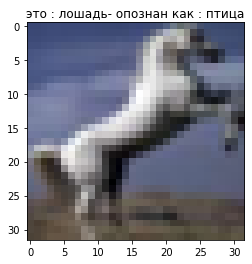

In [ ]:
N = 1941
y_p=model4.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

In [ ]:
history42 = model4.fit(x_train, y_train, batch_size=batch_size,
	epochs=epochs, validation_split=0.2, 
	verbose=1)

Epoch 1/5
1250/1250 [==============================] - 73s 58ms/step - loss: 1.1348 - accuracy: 0.5936 - val_loss: 1.2343 - val_accuracy: 0.5669
Epoch 2/5
1250/1250 [==============================] - 73s 58ms/step - loss: 1.0852 - accuracy: 0.6152 - val_loss: 1.1673 - val_accuracy: 0.5967
Epoch 3/5
1250/1250 [==============================] - 73s 58ms/step - loss: 1.0509 - accuracy: 0.6283 - val_loss: 1.1351 - val_accuracy: 0.6038
Epoch 4/5
1250/1250 [==============================] - 73s 58ms/step - loss: 1.0201 - accuracy: 0.6396 - val_loss: 1.1343 - val_accuracy: 0.6063
Epoch 5/5
1250/1250 [==============================] - 73s 59ms/step - loss: 0.9880 - accuracy: 0.6490 - val_loss: 1.1075 - val_accuracy: 0.6157


In [ ]:
scores4 = model3.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 7s 23ms/step - loss: 1.0687 - accuracy: 0.6392
Test loss: 1.0990113019943237
Test accuracy: 0.6200000047683716


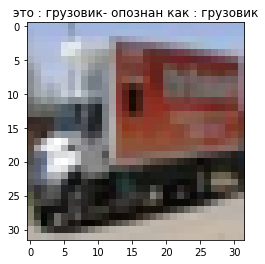

In [ ]:
N = 3982
y_p=model4.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

**Модель 5** Количество карт признаков как в модели 3, но уменьшаем ядро свертки

In [ ]:
model5 = Sequential()

model5.add(Conv2D(16, (5, 5), padding='same', input_shape=x_train.shape[1:]))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model5.add(Conv2D(32, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model5.add(Conv2D(32, (1, 1), padding='same'))
model5.add(Conv2D(64, (1, 1), padding='same'))
model5.add(Conv2D(64, (1, 1), padding='same'))
model5.add(MaxPooling2D(pool_size=(3, 3), strides=2))
model5.add(Flatten())
model5.add(Dense(64))
model5.add(Activation('relu'))
model5.add(Dense(num_classes))
model5.add(Activation('softmax'))

In [ ]:
model5.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
history5 = model5.fit(x_train, y_train, batch_size=batch_size,
	epochs=epochs, validation_split=0.2, 
	verbose=1)

Epoch 1/5
1250/1250 [==============================] - 52s 42ms/step - loss: 1.6089 - accuracy: 0.4135 - val_loss: 1.4009 - val_accuracy: 0.4952
Epoch 2/5
1250/1250 [==============================] - 52s 42ms/step - loss: 1.3223 - accuracy: 0.5263 - val_loss: 1.3062 - val_accuracy: 0.5402
Epoch 3/5
1250/1250 [==============================] - 53s 42ms/step - loss: 1.1900 - accuracy: 0.5763 - val_loss: 1.1916 - val_accuracy: 0.5794
Epoch 4/5
1250/1250 [==============================] - 53s 42ms/step - loss: 1.0929 - accuracy: 0.6116 - val_loss: 1.1152 - val_accuracy: 0.6082
Epoch 5/5
1250/1250 [==============================] - 53s 42ms/step - loss: 1.0206 - accuracy: 0.6420 - val_loss: 1.1126 - val_accuracy: 0.6169


In [ ]:
scores5 = model5.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 4s 13ms/step - loss: 1.1055 - accuracy: 0.6102
Test loss: 1.0990113019943237
Test accuracy: 0.6200000047683716


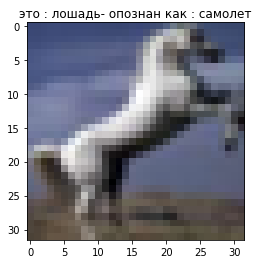

In [ ]:
N = 1941
y_p=model5.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()

In [ ]:
history52 = model5.fit(x_train, y_train, batch_size=batch_size,
	epochs=epochs, validation_split=0.2, 
	verbose=1)

Epoch 1/5
1250/1250 [==============================] - 52s 41ms/step - loss: 0.9629 - accuracy: 0.6653 - val_loss: 1.0960 - val_accuracy: 0.6191
Epoch 2/5
1250/1250 [==============================] - 52s 41ms/step - loss: 0.9109 - accuracy: 0.6799 - val_loss: 1.0583 - val_accuracy: 0.6400
Epoch 3/5
1250/1250 [==============================] - 51s 41ms/step - loss: 0.8642 - accuracy: 0.6985 - val_loss: 1.0018 - val_accuracy: 0.6581
Epoch 4/5
1250/1250 [==============================] - 51s 41ms/step - loss: 0.8245 - accuracy: 0.7116 - val_loss: 1.0096 - val_accuracy: 0.6551
Epoch 5/5
1250/1250 [==============================] - 52s 41ms/step - loss: 0.7915 - accuracy: 0.7232 - val_loss: 0.9991 - val_accuracy: 0.6626


In [ ]:
scores5 = model5.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 4s 13ms/step - loss: 0.9847 - accuracy: 0.6606
Test loss: 1.0990113019943237
Test accuracy: 0.6200000047683716


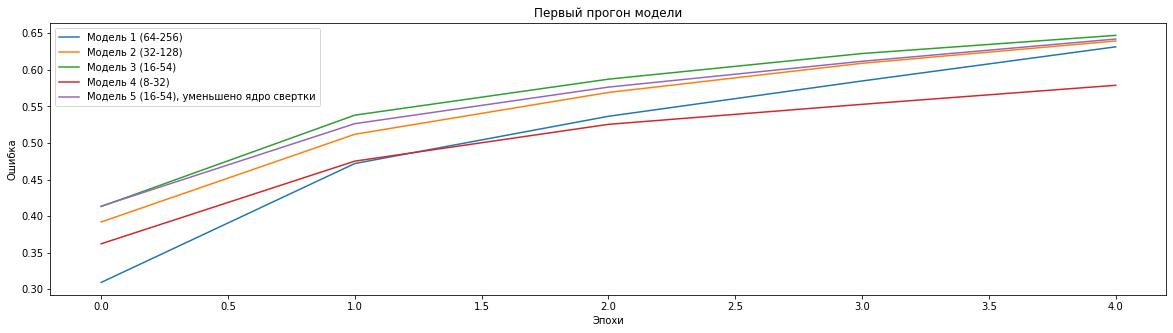

In [ ]:
x1 = history1.history['accuracy']
x2 = history2.history['accuracy']
x3 = history3.history['accuracy']
x4 = history4.history['accuracy']
x5 = history5.history['accuracy']
plt.figure(figsize=(20, 5))

plt.plot(x1, label='Модель 1 (64-256)')
plt.plot(x2, label='Модель 2 (32-128)')
plt.plot(x3, label='Модель 3 (16-54)')
plt.plot(x4, label='Модель 4 (8-32)')
plt.plot(x5, label='Модель 5 (16-54), уменьшено ядро свертки')
plt.title('Первый прогон модели')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.legend(loc="best")
plt.show()

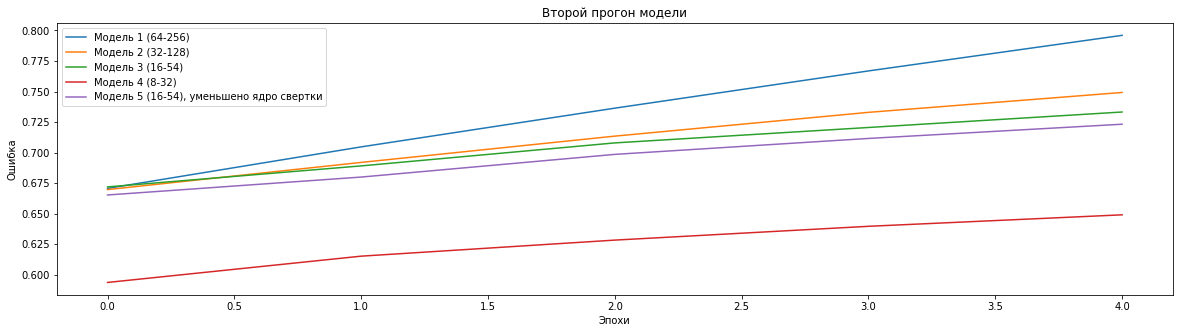

In [ ]:
x1 = history12.history['accuracy']
x2 = history22.history['accuracy']
x3 = history32.history['accuracy']
x4 = history42.history['accuracy']
x5 = history52.history['accuracy']
plt.figure(figsize=(20, 5))

plt.plot(x1, label='Модель 1 (64-256)')
plt.plot(x2, label='Модель 2 (32-128)')
plt.plot(x3, label='Модель 3 (16-54)')
plt.plot(x4, label='Модель 4 (8-32)')
plt.plot(x5, label='Модель 5 (16-54), уменьшено ядро свертки')
plt.title('Второй прогон модели')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.legend(loc="best")
plt.show()

Лучше всего себя показала модель с самым большим количеством карт признаков и большим ядром свертки.
Уменьшение ядра свертки и  дает лучший результат на первых эпохах обучения, но первая модель обгоняет в дальнейшем.
Возможно, для дальнейшего анализа надо построить больше эпох.

In [ ]:
history13 = model.fit(x_train, y_train, batch_size=batch_size,
	epochs=epochs, validation_split=0.2, 
	verbose=1)

Epoch 1/5
1250/1250 [==============================] - 722s 577ms/step - loss: 0.1885 - accuracy: 0.9342 - val_loss: 1.3743 - val_accuracy: 0.6820
Epoch 2/5
1250/1250 [==============================] - 718s 574ms/step - loss: 0.1570 - accuracy: 0.9456 - val_loss: 1.4221 - val_accuracy: 0.6916
Epoch 3/5
1250/1250 [==============================] - 718s 575ms/step - loss: 0.1251 - accuracy: 0.9566 - val_loss: 1.5731 - val_accuracy: 0.6861
Epoch 4/5
1250/1250 [==============================] - 721s 576ms/step - loss: 0.1092 - accuracy: 0.9624 - val_loss: 1.6223 - val_accuracy: 0.6845
Epoch 5/5
1250/1250 [==============================] - 721s 576ms/step - loss: 0.0951 - accuracy: 0.9671 - val_loss: 1.7206 - val_accuracy: 0.6793


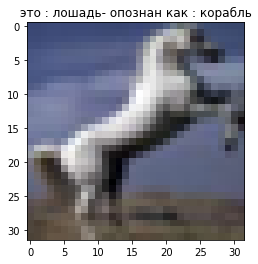

In [ ]:
N = 1941
y_p=model.predict(x_test[N:N+1][:,:,:])
y_t = np.argmax(y_test[N:N+1], axis = 1 )
y_i = np.argmax(y_p, axis = 1 )
plt.imshow(x_test[N][:,:,:])
plt.title('это : '+classes[y_t[0]]+'- опознан как : '+classes[y_i[0]])
plt.show()